In [ ]:
!nvidia-smi

Fri Mar 28 12:07:23 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir '{HOME}/datasets'
DATA_DIR='/content/datasets'

mkdir: cannot create directory ‘/content/datasets’: File exists


In [ ]:
!gdown 1fFJ5LmZ6ruYzIebWqfgqmqeY1LWKfgg4 -O dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1fFJ5LmZ6ruYzIebWqfgqmqeY1LWKfgg4
To: /content/dataset.zip
100% 8.68M/8.68M [00:00<00:00, 110MB/s]


In [ ]:
#!unzip "PATH/TO/YOUR/ZIP/FILE" -d "datasets"

!unzip "dataset.zip" -d "datasets"


Archive:  dataset.zip
replace datasets/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8m-seg.pt data='{DATA_DIR}/data.yaml' epochs=10 imgsz=640

/content
100% 52.4M/52.4M [00:01<00:00, 39.7MB/s]
New https://pypi.org/project/ultralytics/8.3.97 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/datasets/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=

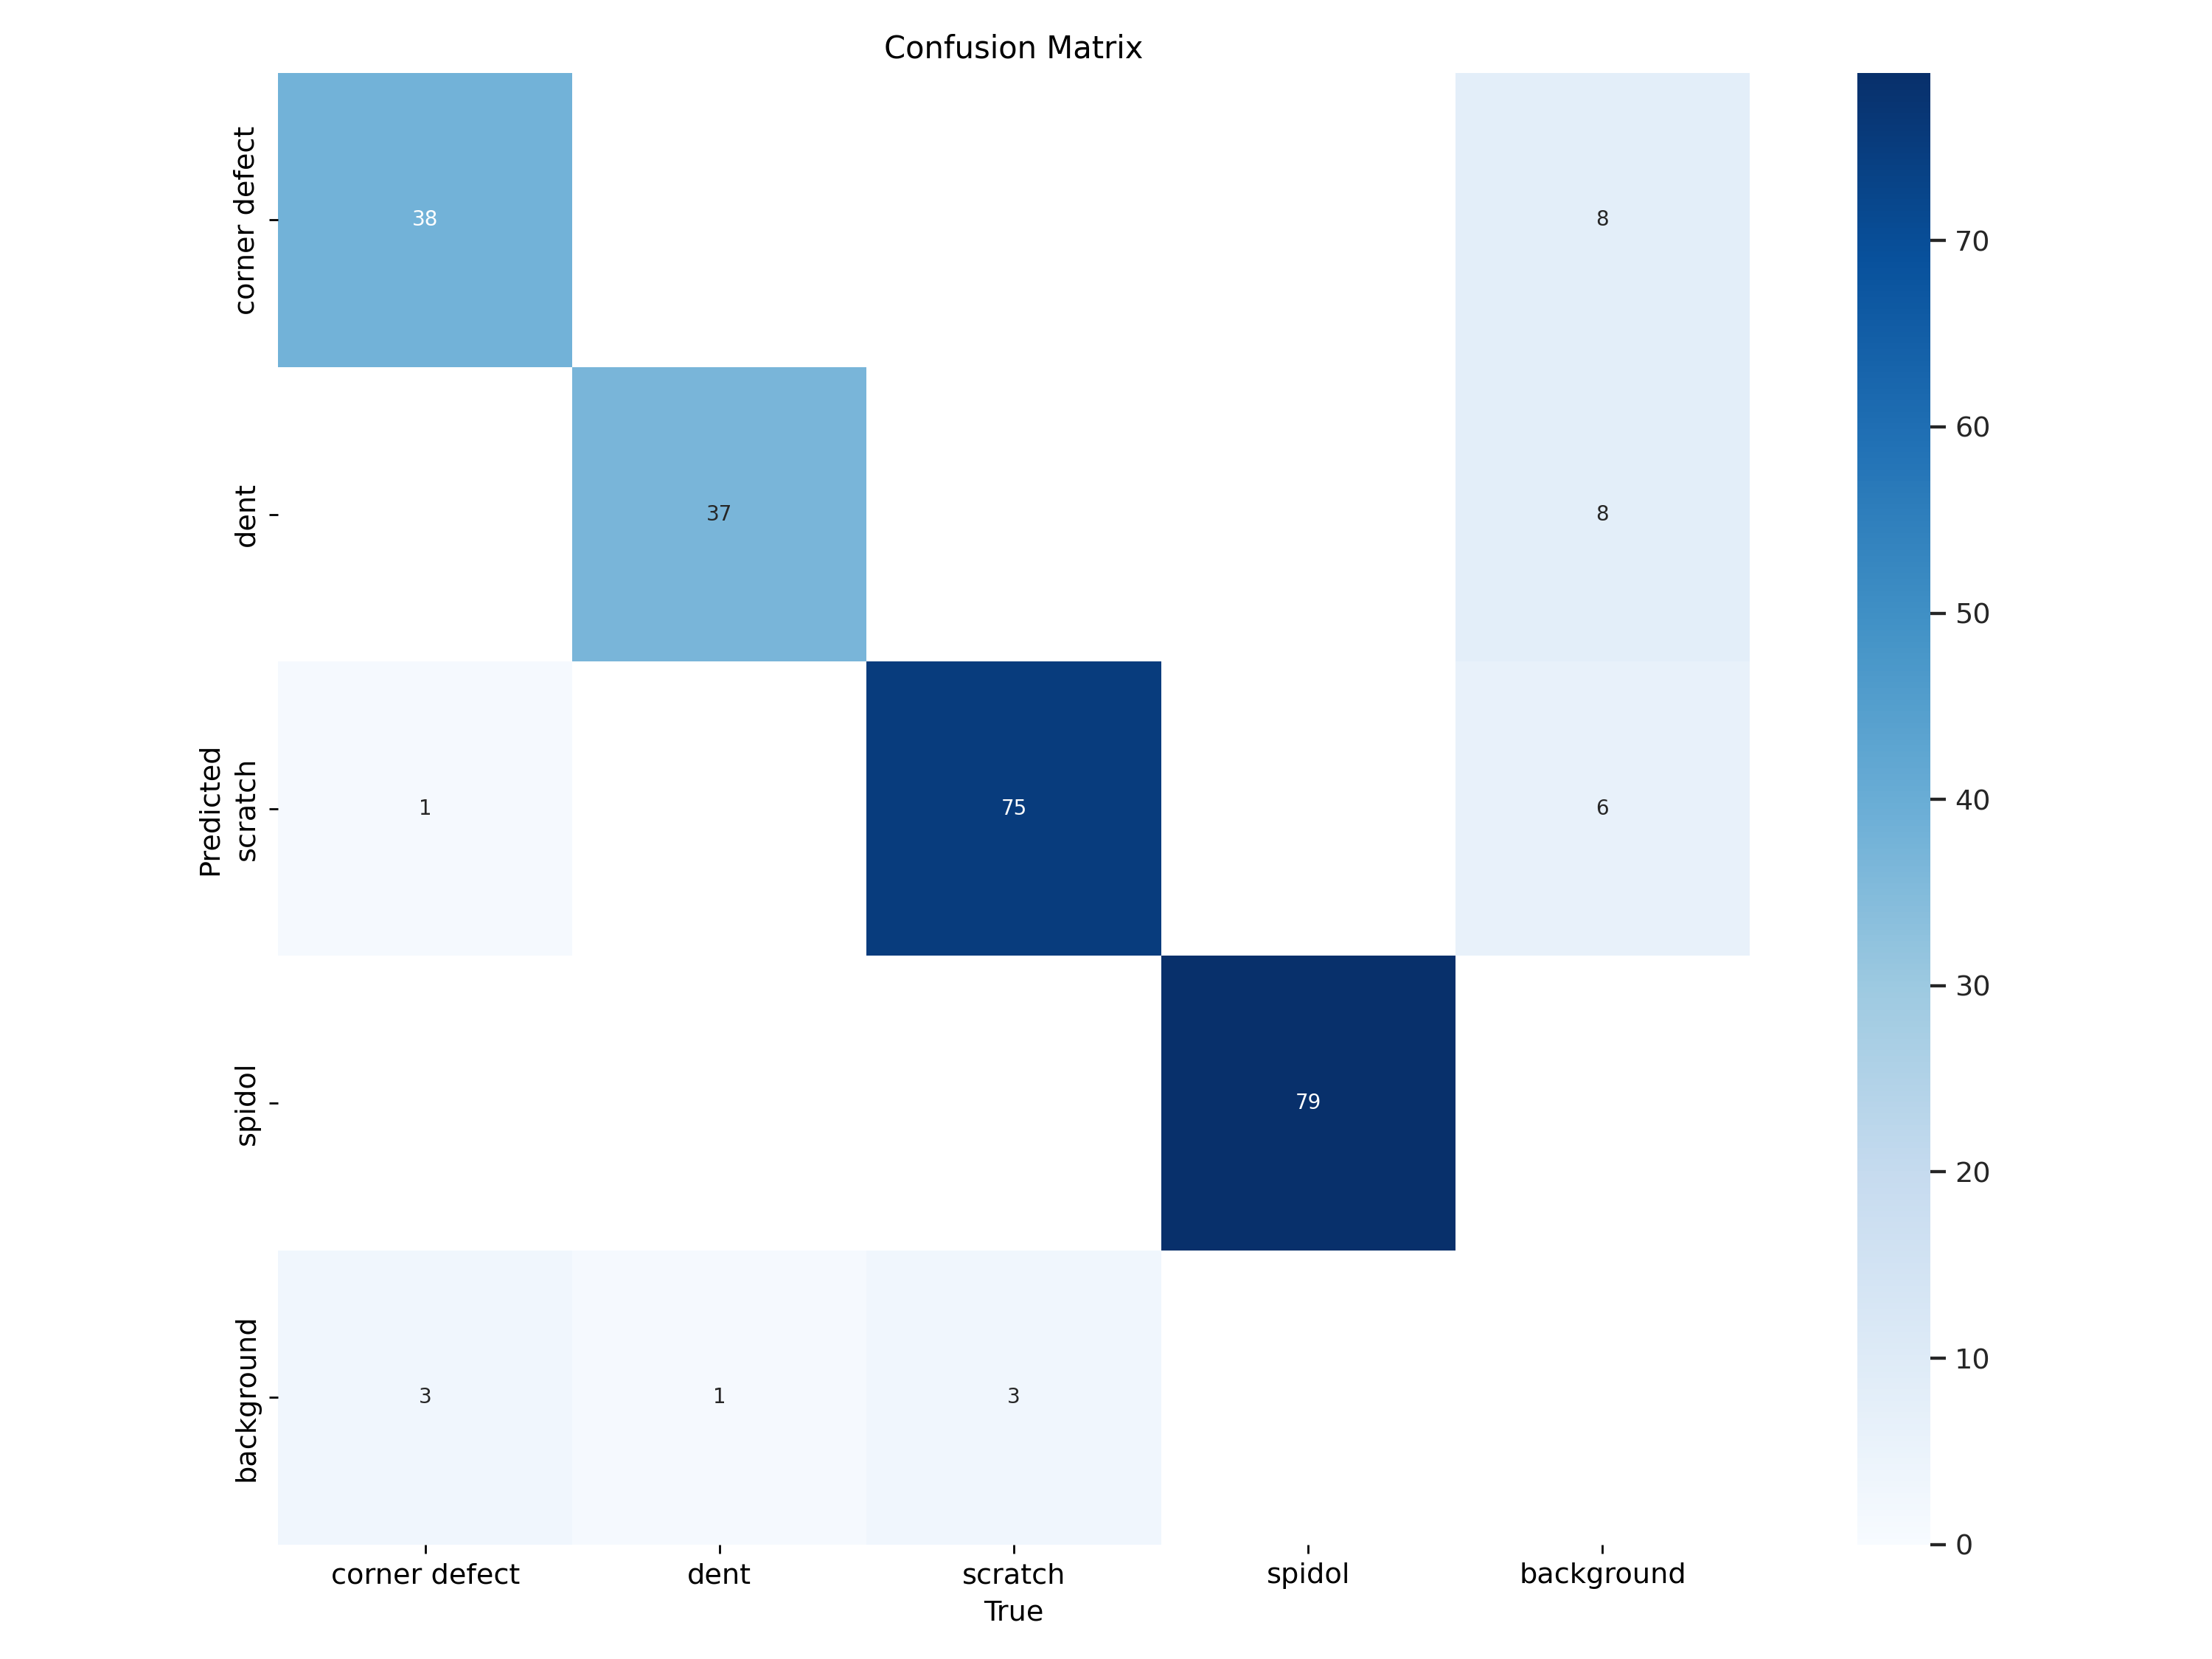

In [ ]:
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png')

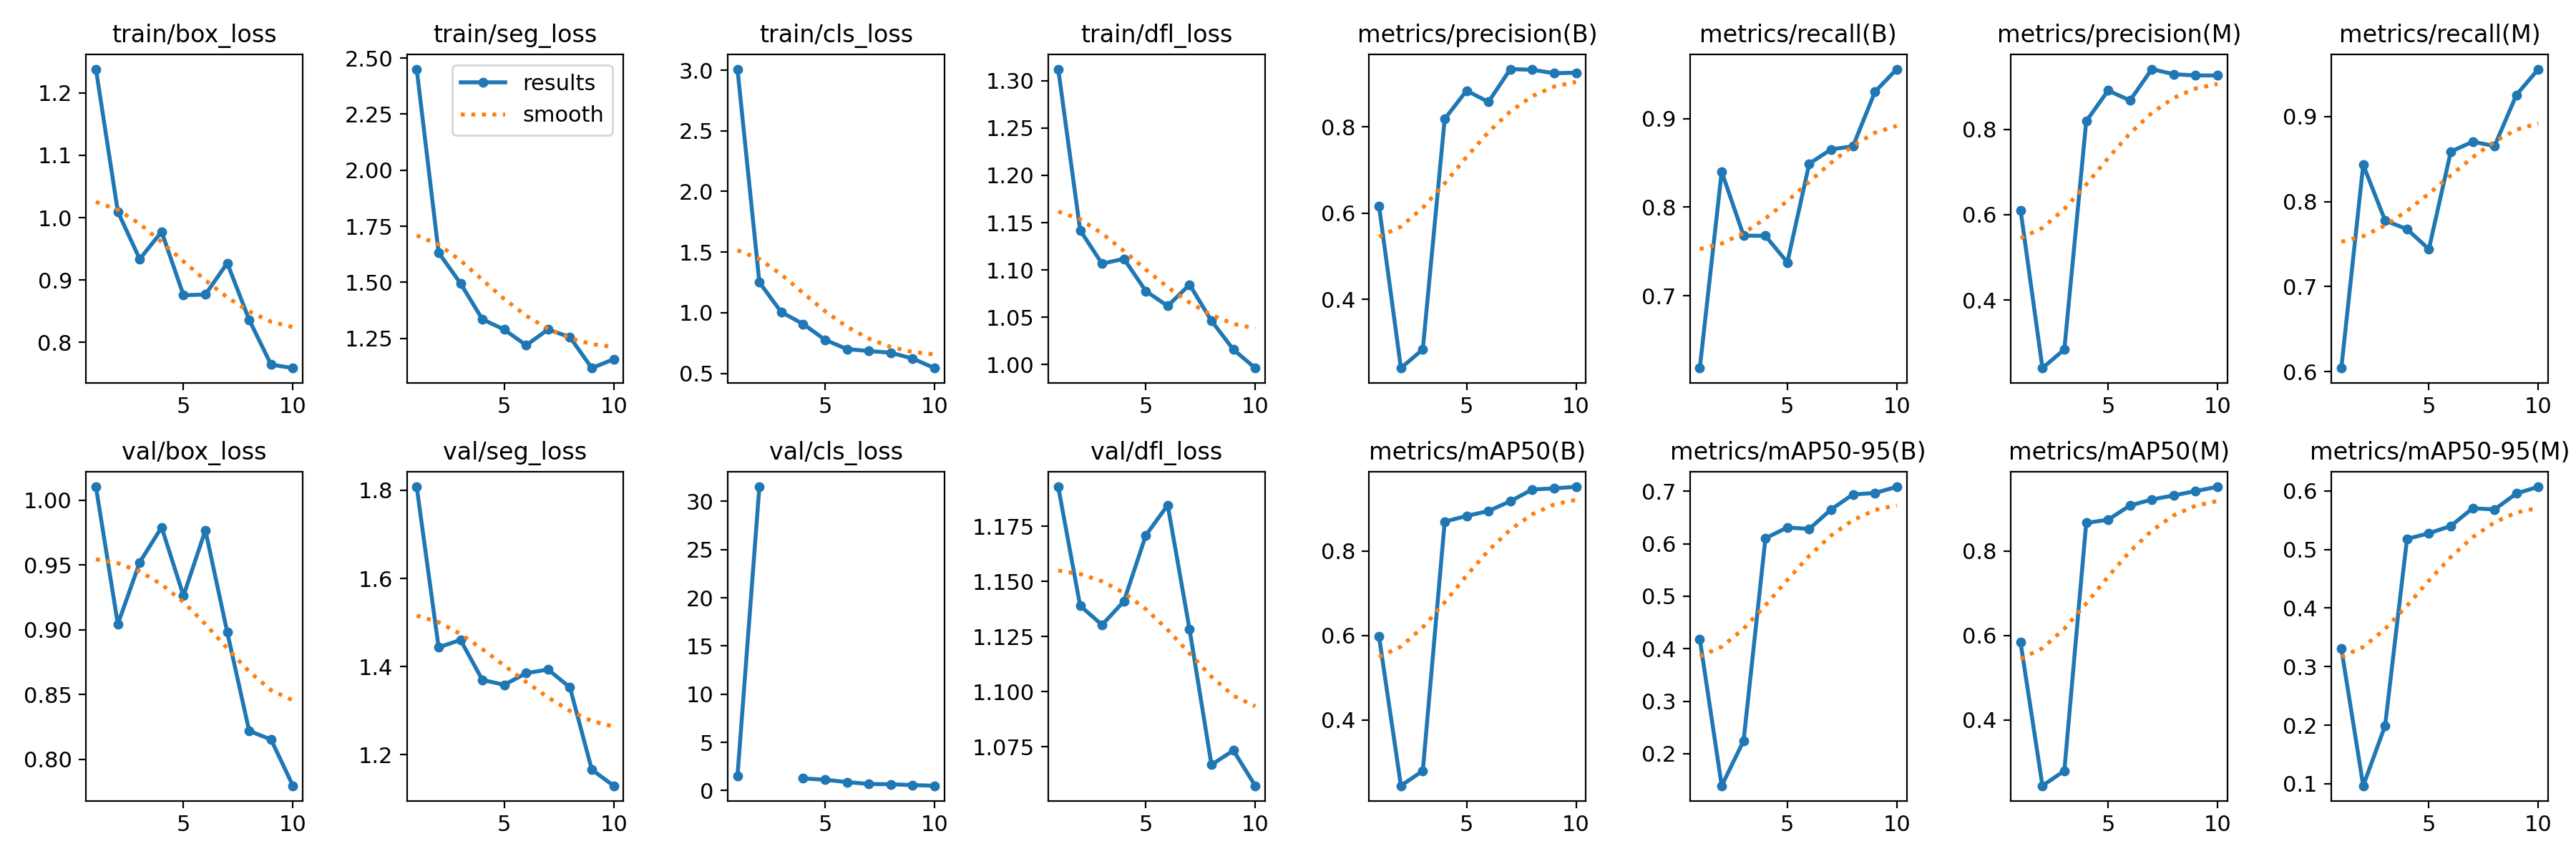

In [ ]:
Image(filename=f'{HOME}/runs/segment/train/results.png')

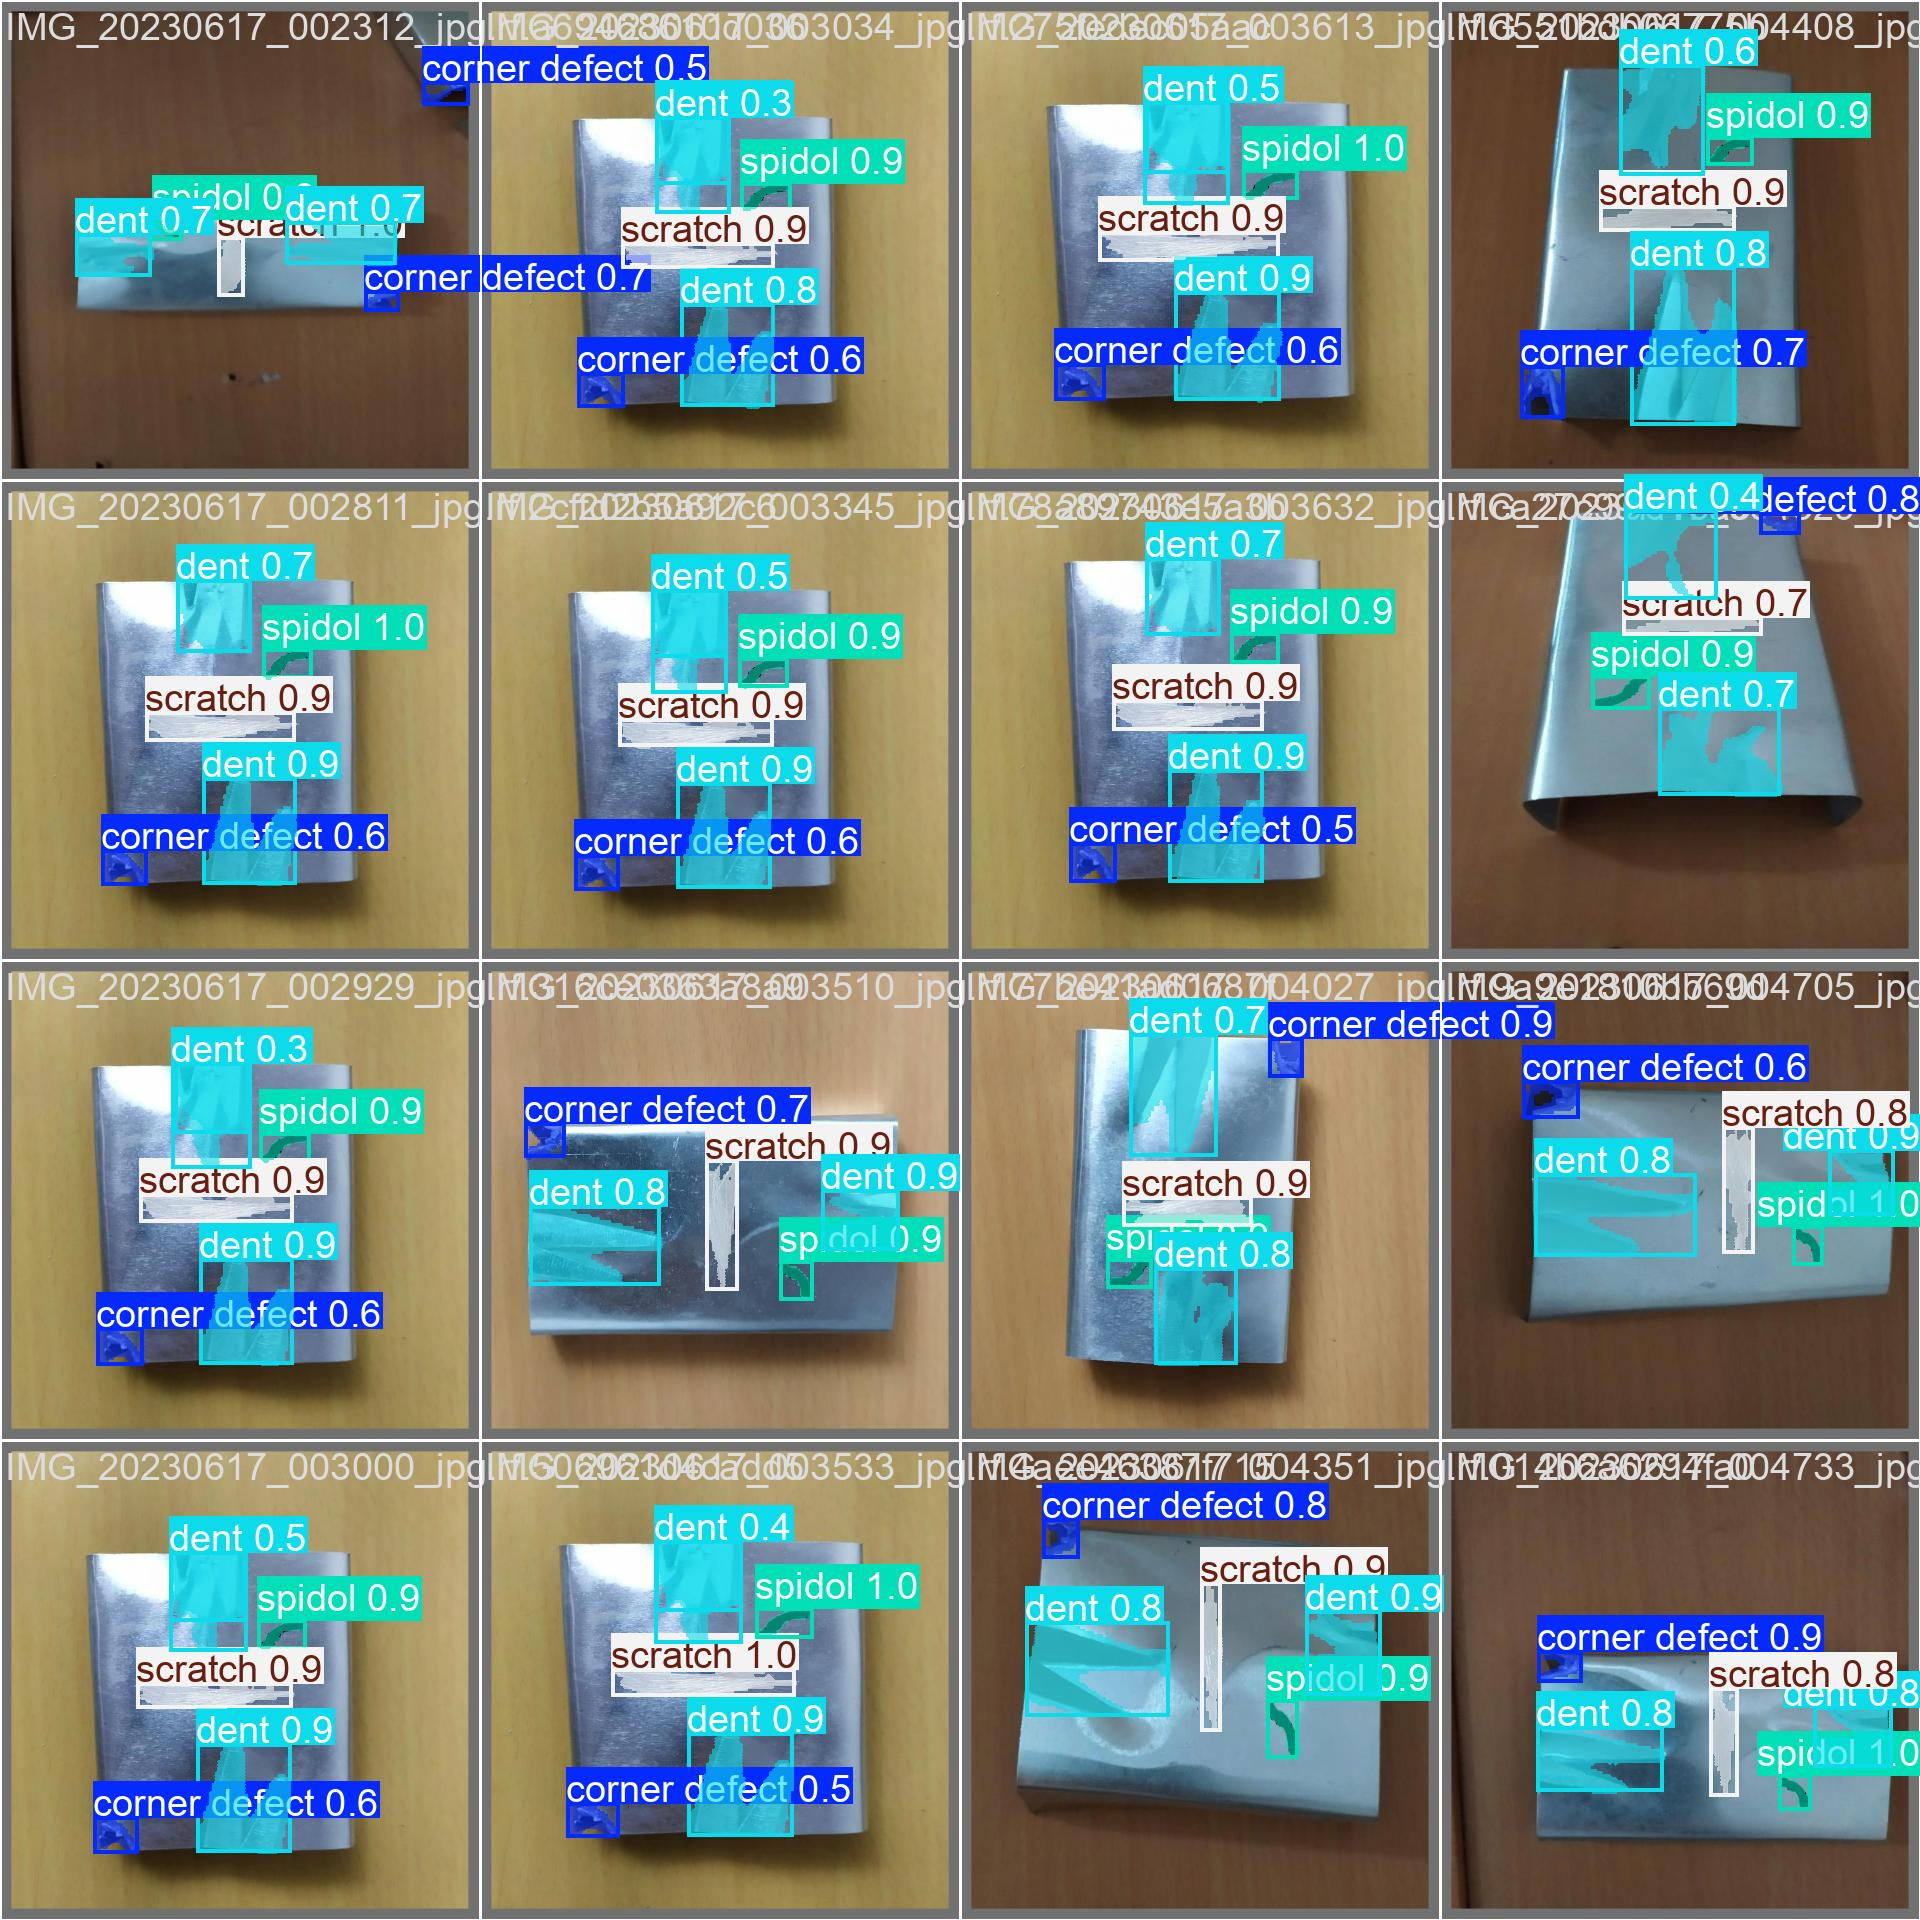

In [ ]:
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg')

In [ ]:
!yolo task=segment mode=val model='{HOME}/runs/segment/train/weights/best.pt' data='{DATA_DIR}/data.yaml'

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,224,700 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/datasets/valid/labels.cache... 59 images, 0 backgrounds, 0 corrupt: 100% 59/59 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.02s/it]
                   all         59        237      0.926      0.956      0.953      0.711      0.926      0.956      0.953      0.605
         corner defect         39         42      0.903      0.889      0.896      0.566      0.903      0.889      0.896      0.356
                  dent         19         38      0.871      0.974      0.954      0.658      0.871      0.974      0.954      0.593
               scratch         58         78      0.931      0.962      0.965      0.728      0.931      0.962      0.965      0.711
   

In [ ]:
!yolo task=segment mode=predict model='{HOME}/runs/segment/train/weights/best.pt' conf=0.25 source='{DATA_DIR}/test/images' save=true

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,224,700 parameters, 0 gradients, 110.0 GFLOPs

image 1/31 /content/datasets/test/images/IMG_20230617_001819_jpg.rf.068b87e66fd78038936d7f96e534bc38.jpg: 640x640 2 corner defects, 2 dents, 2 scratchs, 1 spidol, 45.6ms
image 2/31 /content/datasets/test/images/IMG_20230617_003319_jpg.rf.414e3267fc78e75e13662a969ffca169.jpg: 640x640 1 corner defect, 3 dents, 1 scratch, 1 spidol, 45.7ms
image 3/31 /content/datasets/test/images/IMG_20230617_003840_jpg.rf.cd7ffd72179eebe10deec5086420cca9.jpg: 640x640 1 corner defect, 2 dents, 1 scratch, 1 spidol, 45.7ms
image 4/31 /content/datasets/test/images/IMG_20230617_003909_jpg.rf.fc9b5fc22c7c30333e42efd74238d540.jpg: 640x640 1 corner defect, 2 dents, 1 scratch, 1 spidol, 38.2ms
image 5/31 /content/datasets/test/images/IMG_20230617_004038_jpg.rf.33eaf190af584c6b36f20e230d63a1cd.jpg: 640x640 1 corner defect, 2 dents, 1 scrat

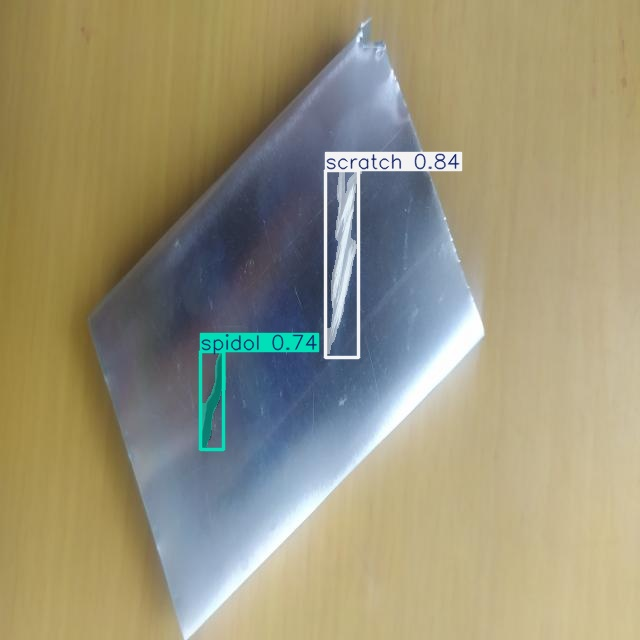

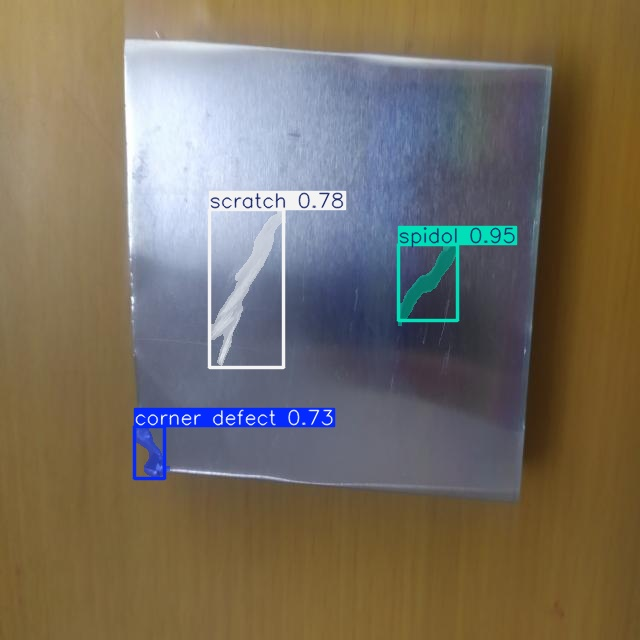

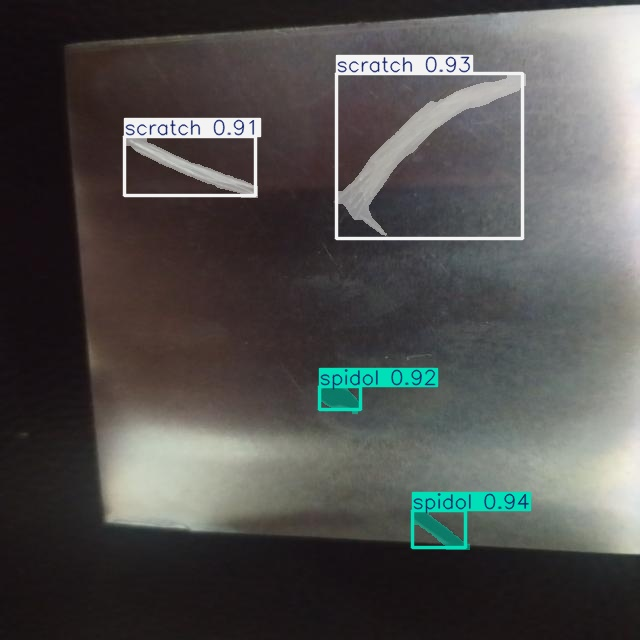

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [1]:
# prompt: can i get the acuracy of this model im MaP

import os
import glob
from IPython.display import Image, display

HOME = os.getcwd()

# Access the results.txt file to extract mAP
results_file = os.path.join(HOME, 'runs', 'segment', 'val', 'results.txt')

if os.path.exists(results_file):
    with open(results_file, 'r') as f:
        for line in f:
            if 'metrics/mAP50-95(B)' in line:  # Look for the mAP line
                mAP = line.split(':')[1].strip()
                print(f"mAP50-95(B): {mAP}")
                break
        else:
            print("mAP value not found in results.txt")
else:
    print(f"Results file not found: {results_file}")

# Display images (if needed)
for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
    display(Image(filename=image_path, height=600))
    print("\n")


Results file not found: /content/runs/segment/val/results.txt


In [ ]:
# prompt:  i need to  dowload the model in code and save in drive directly

import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your model file in the Colab environment
model_path = os.path.join(HOME, 'runs/segment/train/weights/best.pt')

# Define the destination path in your Google Drive
drive_model_path = '/content/drive/My Drive/best_model.pt' # Change 'My Drive' to your desired folder in Google Drive


# Copy the model file to Google Drive
!cp "{model_path}" "{drive_model_path}"

print(f"Model saved to: {drive_model_path}")


Mounted at /content/drive
Model saved to: /content/drive/My Drive/best_model.pt
